In [3]:
from statistics import mean
from pprint import pprint
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')


In [4]:
def show_normals(means_1, means_2):
    x = np.linspace(-10, 10, 500)

    plt.figure(figsize=(10, 6))
    for i, (mu1, mu2) in enumerate(zip(means_1, means_2)):
        y1 = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu1)**2)
        y2 = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu2)**2)

        plt.subplot(1, 10, i + 1)
        plt.plot(y1, x, label=f'μ1={mu1:.1f}')
        plt.plot(y2, x, label=f'μ2={mu2:.1f}', linestyle='--')
        plt.xticks([])
        plt.yticks([])
        plt.gca().invert_xaxis()
        plt.tight_layout()

    plt.show()


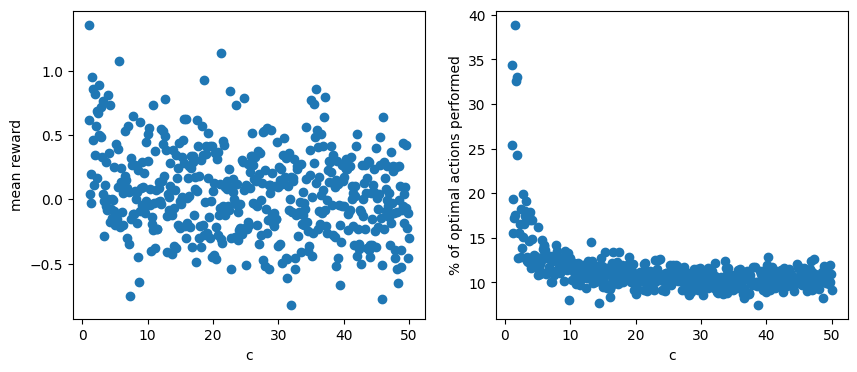

In [5]:

def play(i, Q):
    return np.random.normal(Q[i], 1, 1)[0]

# apply a single episode
def episode(temp, show=False):
    k = 10 # number of arms
    Q = np.random.normal(0, 1, k)  # True value of each arm
    optimal_a = np.argmax(Q)

    # Agent data
    n = np.zeros(k)  # number of executions per action
    q = np.ones(k)  # estimated gain per action
    R = []  # all received rewards

    T = 1000  # number of time steps
    for i in range(T):
        # pick an action using the Boltzmann-distribution of reward estimates
        q_discounted = [np.exp(qa / temp) for qa in q]
        sum_q_discounted = sum(q_discounted)
        weights = [q_d/sum_q_discounted for q_d in q_discounted]
        a = random.choices(np.arange(k), weights=weights)

        # perform the action and get a reward
        r = play(a, Q)
        # save the reward for statistics later
        R.append(r)
        # update the reward estimation for the chosen action
        q[a] = q[a] + (r - q[a]) / (n[a] if n[a] else 1)
        # increase its play-counter
        n[a] += 1

    # compute the average reward
    mean_reward = mean(R)
    if show: show_normals(Q, q)
    # compute the percentage of optimal actions taken
    perc_optimal_a_picks = n[optimal_a] / T * 100
    return mean_reward, perc_optimal_a_picks


mean_rewards = []
percentages_optimal_a_picks = []
# get "all" possible values for c
step=0.1
temps = np.arange(1, 50+step, step)
for temp in temps:
    mr, pop = episode(temp)
    mean_rewards.append(mr)
    percentages_optimal_a_picks.append(pop)

# visualize the results
# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

ax1.scatter(temps, mean_rewards)
ax1.set_xlabel("c")
ax1.set_ylabel("mean reward")

ax2.scatter(temps, percentages_optimal_a_picks)
ax2.set_xlabel("c")
ax2.set_ylabel("% of optimal actions performed")

plt.show()

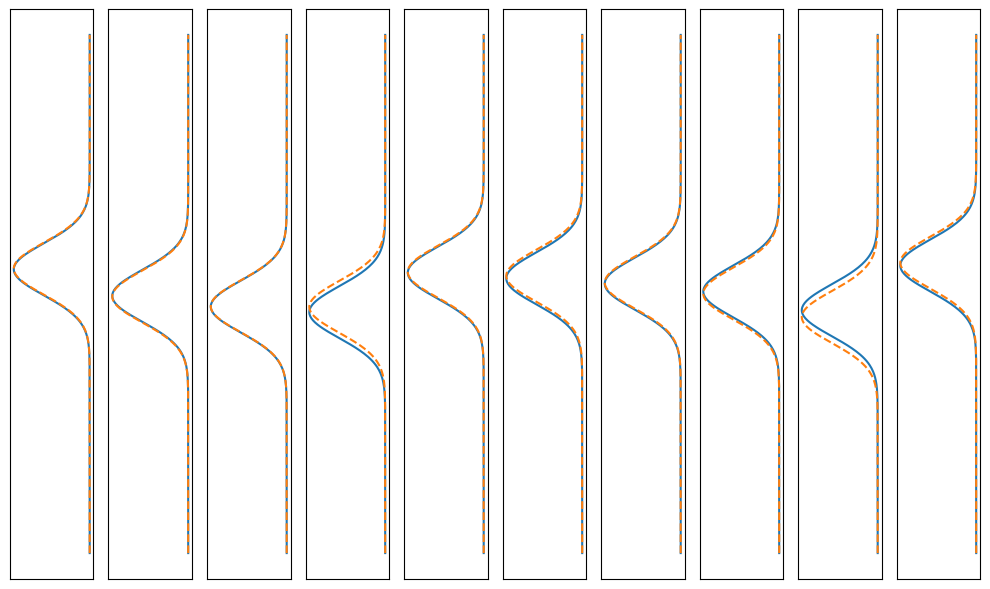

(0.6048912760852193, 22.2)

In [6]:
episode(1, show=True)


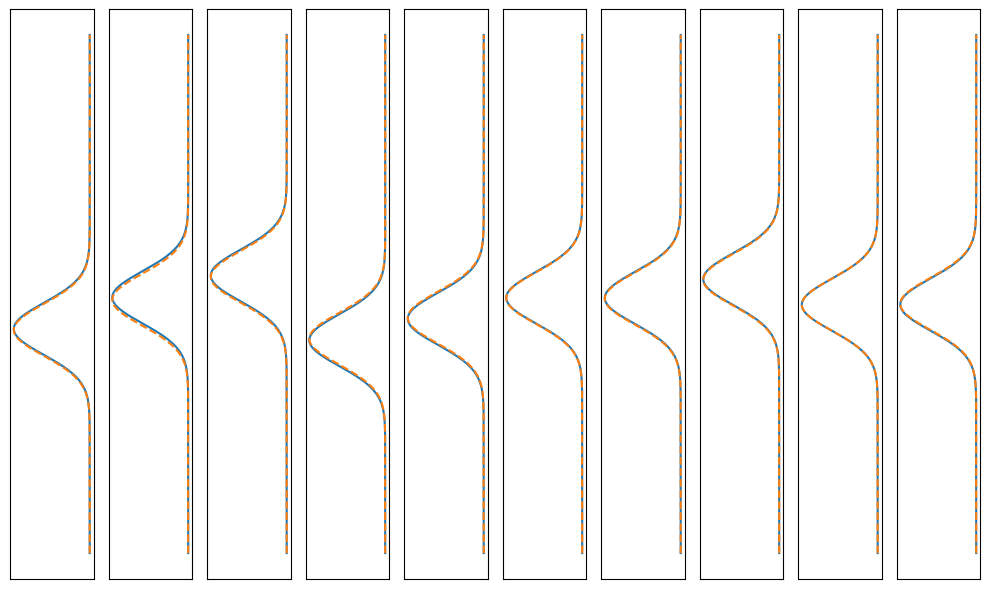

(-0.3127213484896722, 12.2)

In [7]:
episode(4, show=True)


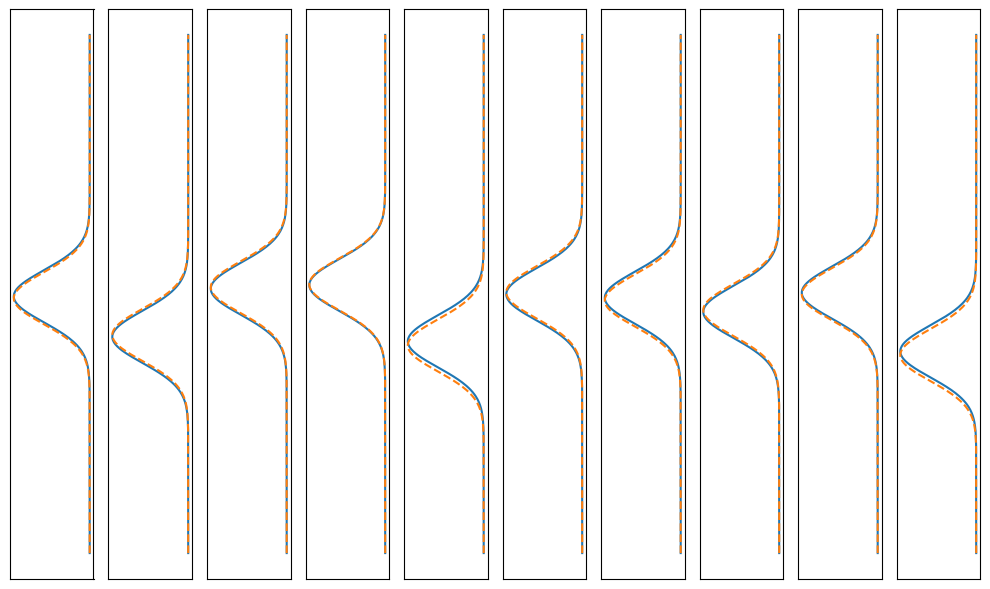

30

In [8]:
episode(1, show=True)
30